## Extra Trees Scikit-Learn API

In [1]:
import sklearn
print(sklearn.__version__)

0.22.1


In [4]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [6]:
# evaluate extra trees algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.906 (0.025)


In [7]:
# make predictions using extra trees for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.52169364,4.00560592,2.94756812,-0.09755101,-0.98835896,1.81021933,-0.32657994,1.08451928,4.98150546,-2.53855736,3.43500614,1.64660497,-4.1557091,-1.55301045,-0.30690987,-1.47665577,6.818756,0.5132918,4.3598337,-4.31785495]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [8]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [9]:
# evaluate extra trees ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# define the model
model = ExtraTreesRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -69.268 (4.942)


In [11]:
# extra trees for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# define the model
model = ExtraTreesRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.56996683,0.80144889,2.77523539,1.32554027,-1.44494378,-0.80834175,-0.84142896,0.57710245,0.96235932,-0.66303907,-1.13994112,0.49887995,1.40752035,-0.2995842,-0.05708706,-2.08701456,1.17768469,0.13474234,0.09518152,-0.07603207]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 53


>10 0.850 (0.039)
>50 0.902 (0.024)
>100 0.907 (0.026)
>500 0.912 (0.024)
>1000 0.913 (0.025)
>5000 0.911 (0.026)


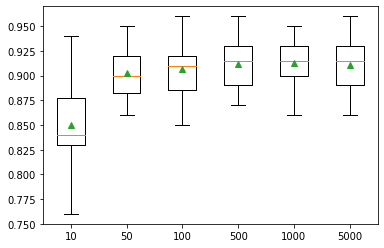

In [12]:
# explore extra trees number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = ExtraTreesClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.894 (0.028)
>2 0.900 (0.030)
>3 0.905 (0.028)
>4 0.901 (0.029)
>5 0.910 (0.027)
>6 0.903 (0.025)
>7 0.912 (0.024)
>8 0.912 (0.023)
>9 0.907 (0.024)
>10 0.913 (0.031)
>11 0.910 (0.028)
>12 0.907 (0.027)
>13 0.908 (0.025)
>14 0.908 (0.023)
>15 0.909 (0.022)
>16 0.904 (0.030)
>17 0.907 (0.024)
>18 0.907 (0.026)
>19 0.910 (0.024)
>20 0.906 (0.026)


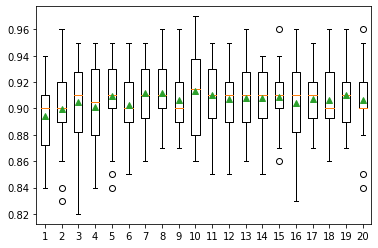

In [13]:
# explore extra trees number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 20
	for i in range(1, 21):
		models[str(i)] = ExtraTreesClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>2 0.908 (0.023)
>3 0.909 (0.024)
>4 0.907 (0.028)
>5 0.902 (0.026)
>6 0.906 (0.026)
>7 0.903 (0.026)
>8 0.897 (0.028)
>9 0.898 (0.024)
>10 0.897 (0.030)
>11 0.895 (0.031)
>12 0.891 (0.027)
>13 0.891 (0.030)
>14 0.893 (0.027)


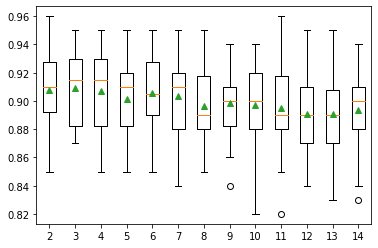

In [14]:
# explore extra trees minimum number of samples for a split effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore the number of samples per split from 2 to 14
	for i in range(2, 15):
		models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Comentarios del ejercicio

* A diferencia de un Random Forest los Extra Tree seleccionan el punto de corte de los features para un nodo totalmente al azar.

* Cada árbol es entrenado con la totalidad del dataset de entrenamiento.

* Me pareció muy interesante como a la hora de ajustar el hiperparametro de cantidad de árboles no produzca un sobreajuste.

* Se puede contrarrestar la alta varianza del resultado de un algoritmo de Extra Tree aumentando su cantidad de árboles.

* Que su desempeño se vea beneficiado de crear arboles mas especializados y con resultados menos correlacionados entre árboles.

* Existe una heurística para la selección de atributos por nodo que calcula la raíz cuadrada de los atributos totales como un buen valor, sin embargo se puede explorar en ese vecindario de valores por un valor que desempeñe mejor.



## Comentarios sobre parámetros:

* El parámetro de n_estimators controla la cantidad de árboles de decisión que se utilizarán , entre más hayan se suele tener un mejor resultado ya que el filtro que se hace es mejor entre cada capa que pasa. Su default es 100.

* El parámetro de “colsample_bytree", controla la cantidad de features que tiene cada árbol, si se aumenta se recomienda también aumentar la cantidad de árboles que se utilizan.

*  El parámetro de min_samples_split es la canitdad de muestar que cada nodo del árbol de decisión tiene antes de cada split. Cada split se añade cuanndo se llega o se pasa la canitda de muestras definidas con este parámetro, entre menor sea el límite, hay más splits y más profundidad, lo que genera mejores resultados.

